In [1]:

import pandas as pd
import math
import matplotlib.pyplot as plt
from datetime import datetime

# Make Jupyter take up the whole browser window -- Comment out outside of Jupyter Notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# COVID DATASET INITIALIZERS AND CLASSES

In [2]:
class covidCasesClass(object):
    '''
        covidCasesClass -- Requires a path to the CSV file to be analyzed. -- Analyze Covid cases by confirmed totals, distribution, and progression.
            Dependecies:
                pandas
                datetime
                math
                matplotlib
    '''
    def __init__(self, path):
        # Read in the CSV passed in via path
        self.data = pd.read_csv(path)
        # Replace NaN with 0's to make math easier
        self.data = self.data.fillna(0)        
        
    def totalConfirmedCases(self, startDate, endDate):
        '''
            totalConfirmedCases -- Requires start and end dates and reports total confirmed cases within that window across the US.
        '''
        # Init total confirmed cases
        self.totalConfirmedCount = 0        
        # Iterate over the rows of the dataframe to identify confirmed case values that fall within date range -- Need to do conversion to datetime data type for >= and <= to properly match
        for index, row in self.data.iterrows():        
            if datetime.strptime(row['submission_date'], "%m/%d/%Y") >= startDate and \
               datetime.strptime(row['submission_date'], "%m/%d/%Y") <= endDate :
                self.totalConfirmedCount = self.totalConfirmedCount + row['new_case'] 
        # Report total confirmed Cases
        print(f"Date Window: {startDate} - {endDate}")
        print("Total Confirmed Cases: {:,}".format(int(self.totalConfirmedCount)))

    def distribution(self):
        '''
            distribution -- No input requirements. Looks as total cases across US States since reporting began and displays a bar graph of reported values.
        '''
        # Adjust the size matplotlib displays the figure
        plt.rcParams['figure.figsize'] = [20,8]
        # Init figure and axis
        fig = plt.figure()        
        axis = fig.add_axes([0,0,1,1])  
        states = {}
        # Interate over rows of dataframe capturing total case per state
        for index,row in self.data.iterrows():
            try:
                states[row['state']] += row['tot_cases']                 
            except:
                states[row['state']] = 0
        # Make bar graph
        axis.bar(states.keys(), states.values())
        # Rotate x labels
        plt.xticks(rotation=90)
        plt.show()            

    def progression(self):
        '''
            progression -- No input requirements. Looks as new cases since reporting began across US and displays a graph integrated and raw values.
        '''
        # Make a copy of the dataframe so we can modify the input data to convert date format and re-sort the data frame
        self.data_pyDate = self.data
        self.data_pyDate['submission_date'] = pd.to_datetime(self.data_pyDate['submission_date'])
        self.data_pyDate.sort_values(by=['submission_date'], inplace=True, ascending=True)
        
        # Iterate over re-sorted data capturing new cases
        for index,row in self.data_pyDate.iterrows():
            try:                
                runningTotal.append(runningTotal[-1] + row['new_case'])
            except:
                runningTotal = [row['new_case']]
        
        # Plot daily new cases
        plt.plot(self.data_pyDate['submission_date'], self.data_pyDate['new_case'])
        plt.xlabel('Date')
        plt.ylabel('Total')
        plt.title('Daily New Cases')
        plt.show()
        
        # Plot running sum of new cases
        plt.plot(self.data_pyDate['submission_date'], runningTotal)
        plt.xlabel('Date')
        plt.ylabel('Total')
        plt.title('Running Sum of New Cases')
        plt.show()            

        
class covidVaccinesClass(object):
    '''
        covidVaccineClass -- Requires a path to the CSV file to be analyzed. -- Analyze Covid vaccines by distribution
            Dependecies:
                pandas                
                matplotlib
    '''
    def __init__(self, path):
        # Read in csv file from path skipping metadata rows
        self.data = pd.read_csv(path, skiprows=3)
        
    def vaccineDistribution(self):
        '''
            vaccineDistribution -- No input requirements. Creates 2 plots for vaccine distribution in total and per 100k individuals
        '''
        # Plot total distributed vaccines by state
        plt.rcParams['figure.figsize'] = [20,8]        
        fig = plt.figure()
        axis = fig.add_axes([0,0,1,1])       
        axis.bar(self.data['State/Territory/Federal Entity'], self.data['Total Distributed'])
        plt.xticks(rotation=90)
        plt.title('Total Vaccine Distribution')
        plt.xlabel('States')
        plt.ylabel('Amount Distributed')
        plt.show()
        
        # Plot distributed vaccinces per 100k by state
        figb = plt.figure()
        axis = figb.add_axes([0,0,1,1])       
        axis.bar(self.data['State/Territory/Federal Entity'], self.data['Distributed per 100K'])
        plt.xticks(rotation=90)
        plt.title('Total Vaccine Distribution per 100K')
        plt.xlabel('States')
        plt.ylabel('Amount Distributed')
        plt.show()

# Init classes        
covidCases = covidCasesClass(r"covid19_coding_project\covid19\data\United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")
covidVaccines = covidVaccinesClass(r"covid19_coding_project\covid19\data\covid19_vaccinations_in_the_united_states.csv")        

# Analysis

# Total Confirmed Cases from March to June 2020

In [3]:
# Call totalConfirmedCases method on the covidCases class with the date range as datetime data types
covidCases.totalConfirmedCases(datetime.strptime("03/01/2020", "%m/%d/%Y"),datetime.strptime("06/30/2020", "%m/%d/%Y"))

Date Window: 2020-03-01 00:00:00 - 2020-06-30 00:00:00
Total Confirmed Cases: 2,626,377


63 and 1/2 million cases in 3 months seems quite high! << THIS CODE MIGHT NOT BE WORKING!!! >> Wrong field in the dataframe...

2.6 million agrees with the other figures. That said in the first 3 months of the pandemic, we saw 0.74% of the population infected.

# Vaccine Distribution

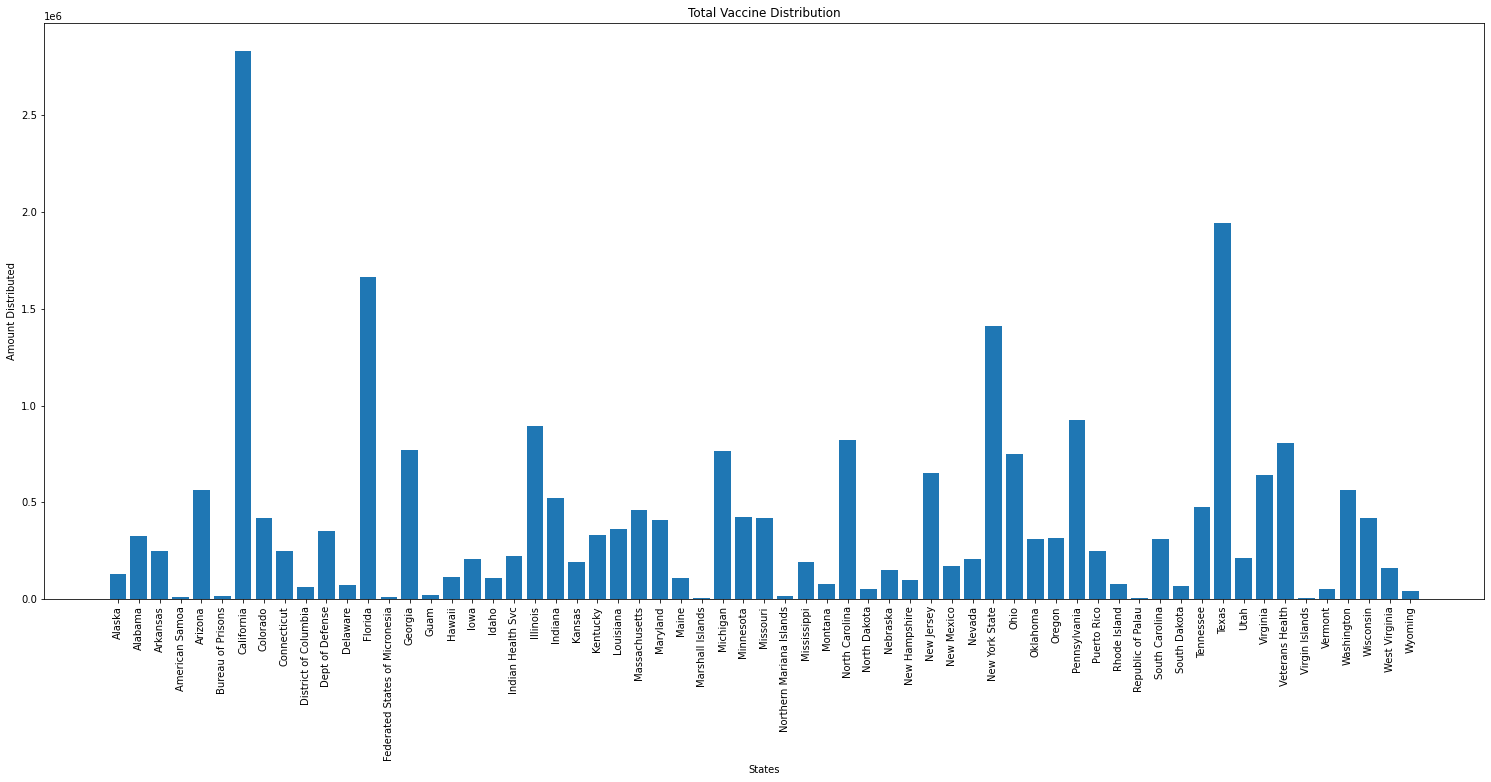

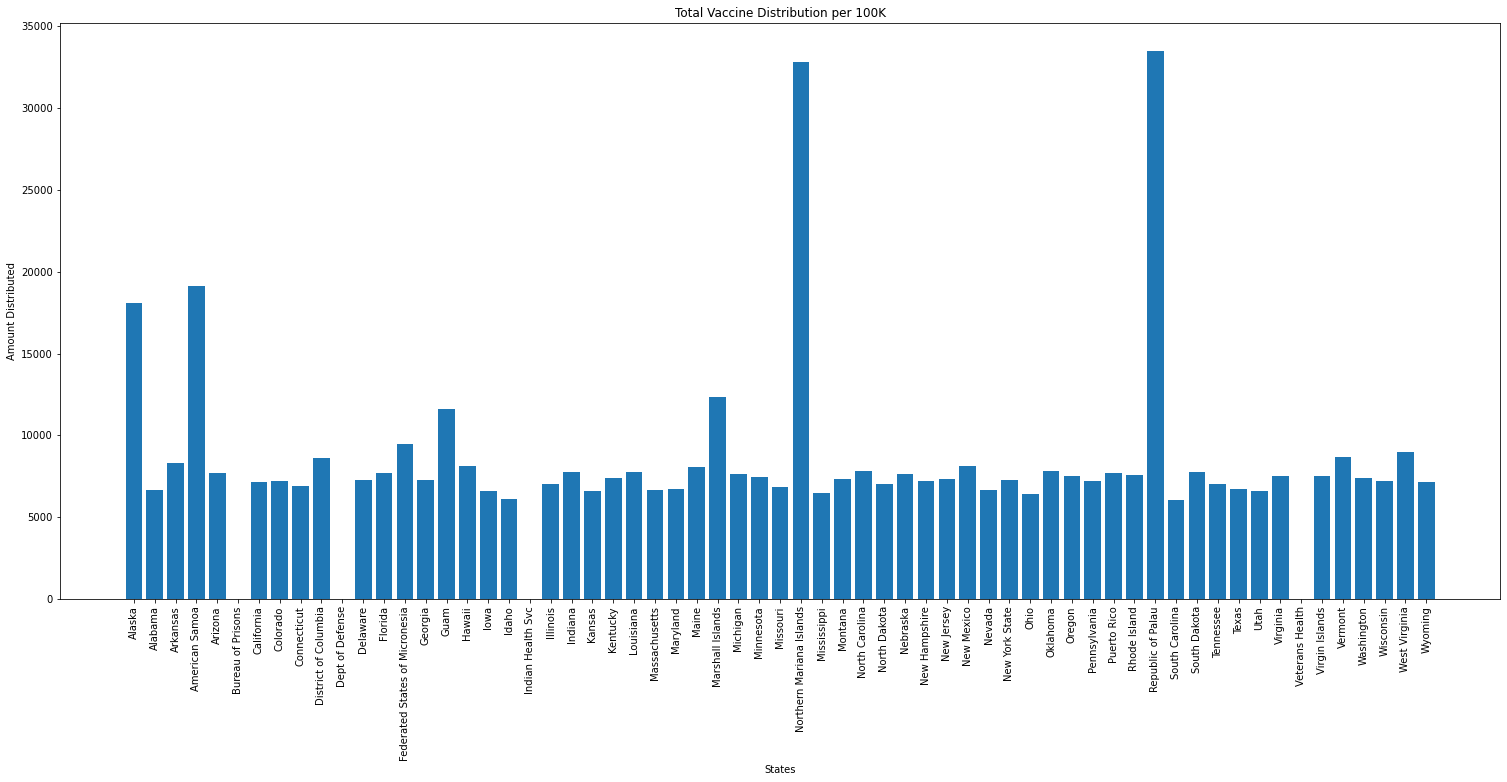

In [4]:
#. What do you think about fairness of vaccine distribution across the US? 
covidVaccines.vaccineDistribution()

From the first plot of raw total vaccine distribution, the sharing/fairness of distribution would be a concern.

From the second plot, after taking into account state population variance, distribution seems far more fair with territories of exceedingly small and isolated populations as the outliers.

# Case Distribution by State

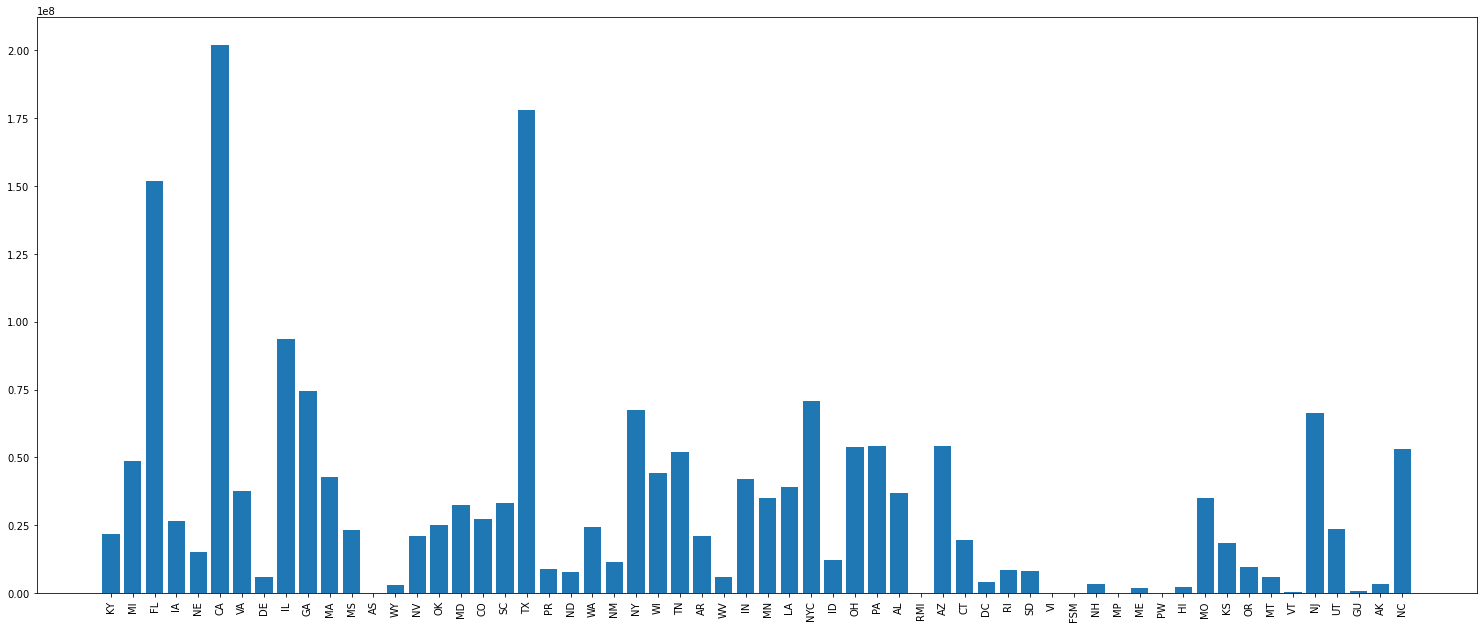

In [5]:
#. How do you describe distribution and progression of the pandemic in the US?
covidCases.distribution()


Here we can see a trend where states with higher populations (CA, TX, FL, IL) have higher cases. I would really like to see this graph by 100K people. 

Interestingly, NY and NYC are split up. If I remember correctly, NYC has 3X the population of the rest of the state but you can clearly see that they do not have 3X the cases. Possibly because of how many people may be exposed in NYC that then get reported in Upstate NY.

# Case Progression

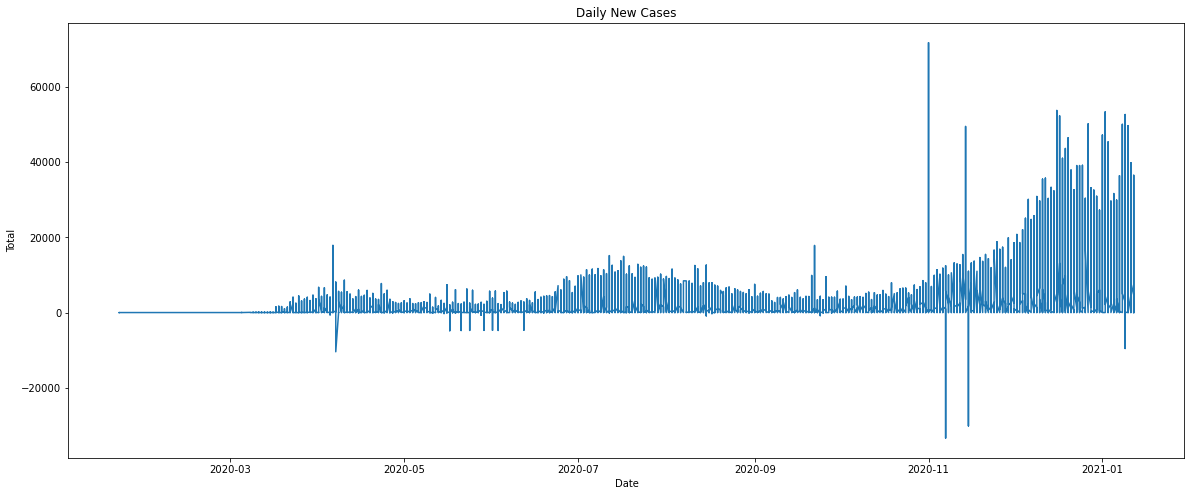

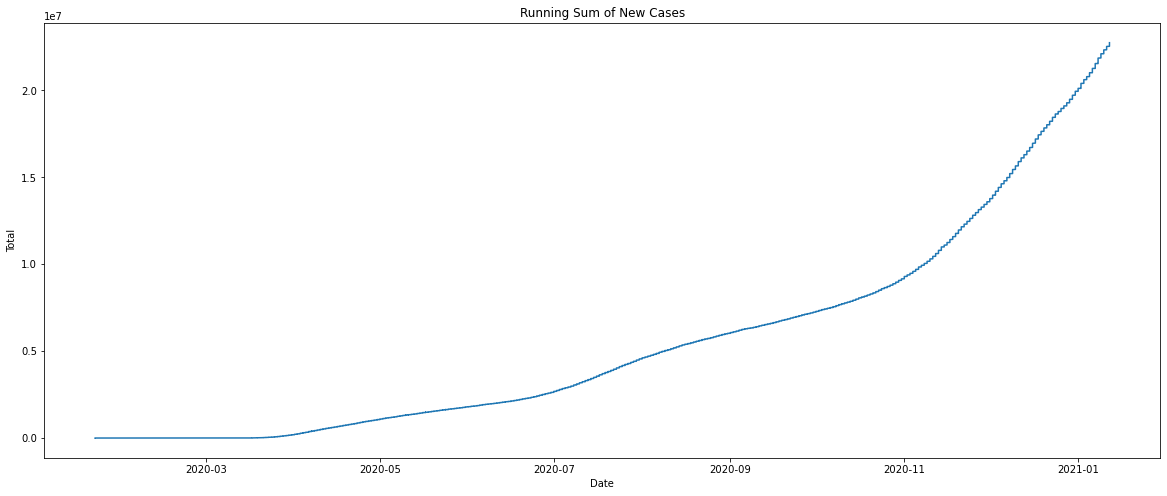

In [6]:
covidCases.progression()

Covid Progession. Seeing the numbers, I really hope the vaccines are succesful. 

We can see anytime the slope of the graphs decrease, there were periods of lower spread. Right now, we appear to have a decrease of slope meaning spread is slowing. I would like to see the derivative and gradient of the running sum graph.

The daily new cases have negative values in them. I would like to investigate what datapoints those are and confirm they are not erroneous.

# Commentary


Based on these data do you think the covid will go away?

    - COVID is definitely not going away. There has been exasterbation of the spread of the disease in recent weeks but the last and first quarters of the year see the most indoor gatherings and past a certain point, the discipline of large people wains.
    
Any unexpected outcomes you discovered from these data?
    
    - Interestingly, the correlation of restriction and spread does not seem strong (more restriction, less spread). CA was one of the first stay-at-home orders and 5/7 of their population has had the disease.
    - The distribution of the vaccines has been incredibly fair. I am sure looking at the finer detail and removing the outlyer territories, would yeild more evidence of variance but at a glance, the general distribution of the vaccine looks fair.
    

According to MeicineNet,  second wave is defined as a phenomenon of infections that can develop during a pandemic. The disease infects one group of people first. Infections appear to decrease. And then, infections increase in a different part of the population, resulting in a second wave of infections. When do you think the second wave happened?

    - I would quantify anytime there is a substantial change in the slope of the running sum of new cases curves (increasing slope that is), there is a 'wave' of infection. Curiously, some of those inflection points of the graph can be tied to social events and some cannot.

Did warm weather stop the outbreak of covid?

    - Stop, no. Slowed, yes. With summer coming again and the vaccines being distributed, let's hope the two factors help to get the pandemic into a lower class of disease control.
        To this point, some credit for July not looking like Nov. is worth giving to the warmer weather. 
            Not captured in this set but this is also reflected in Australia and NZ where warm weather has helped a much smaller population trend often towards 0 cases and let's hope they can get the vaccines administered timely before their winter.

What are the chances that covid will hit again?

    - High. I feel COVID will follow the pattern of the influenza once it is under control. There will need to be updated vaccinces, possibly not annually like the flu, and if they miss the mark, we could see an epidemic. 
        I do not think there will be another pandemic once this disease classification is lowered but that does not decrease the need for vigilance (as the same applies to the flu).

Why is covid dangerous?
    
    - From the graphs, the rate of change of the spread of new cases is clearly evident. This is reflected by how quickly the inflection points turn. And thereafter the spread is sustained for some time. 
        I would really like to look at this data again once the vaccines are widely being taken by large percentages of the population.
        
What insights do you have for both infection and mortalilty rates in first and second wave?

    - I did not have time to investigate mortality rates. By infection alone though, the 'second wave' or the spread since Nov. dwarfs the initial spread of the disease.
